In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv("nba_2022-23_all_stats_with_salary.csv")
df_add = pd.read_csv("all_seasons.csv")
 # Basic information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [7]:
df.head()


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [6]:
df_add.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


 Data Preprocessing

In [3]:


def show_missing_columns(df):
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    for column, count in missing_columns.items():
        print(f"{column}: {count} missing values")




print("The missing values in the nba_2022-23_all_stats_with_salary.csv")
show_missing_columns(df)
print("The missing values in the all_seasons.csv")
show_missing_columns(df_add)







The missing values in the nba_2022-23_all_stats_with_salary.csv
FG%: 1 missing values
3P%: 13 missing values
2P%: 4 missing values
eFG%: 1 missing values
FT%: 23 missing values
TS%: 1 missing values
3PAr: 1 missing values
FTr: 1 missing values
The missing values in the all_seasons.csv
college: 1854 missing values


fot the first :giving 0 vaalue to the null values aa it is considered that the player didn't score 
for the scond dtata set giving the value "unkown" to the missing values in attribute college , as missing college might mean the player is international or went directly to the NBA.

In [4]:
df_add['college'].fillna('Unknown', inplace=True)
df.fillna({
    'FG%': 0,
    '3P%': 0,
    '2P%': 0,
    'eFG%': 0,
    'FT%': 0,
    'TS%': 0,
    '3PAr': 0,
    'FTr': 0
}, inplace=True)

print("The missing values in the nba_2022-23_all_stats_with_salary.csv")
show_missing_columns(df)
print("The missing values in the all_seasons.csv")
show_missing_columns(df_add)



The missing values in the nba_2022-23_all_stats_with_salary.csv
The missing values in the all_seasons.csv


C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\1225531337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_add['college'].fillna('Unknown', inplace=True)


cheking the duplicates and remove them if they are existing 

In [8]:
def check_duplicates(df):
    
    
    # Count duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)

check_duplicates(df)
check_duplicates(df_add)


Number of duplicate rows: 0
Number of duplicate rows: 0


 Exploratory Data Analysis (EDA)

In [24]:
pip install seaborn
pip install plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


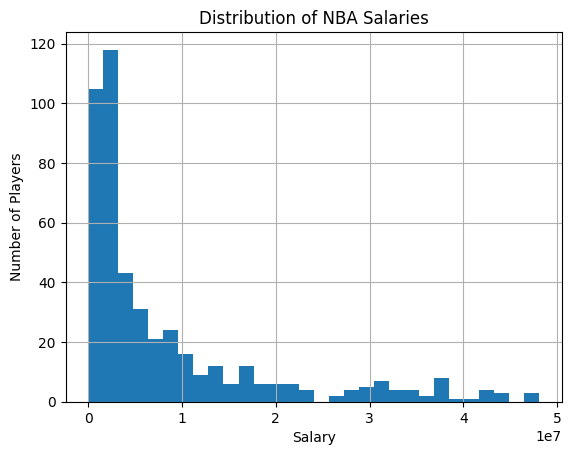

In [26]:
import matplotlib.pyplot as plt
df['Salary'].hist(bins=30)
plt.title("Distribution of NBA Salaries")
plt.xlabel("Salary")
plt.ylabel("Number of Players")
plt.show()

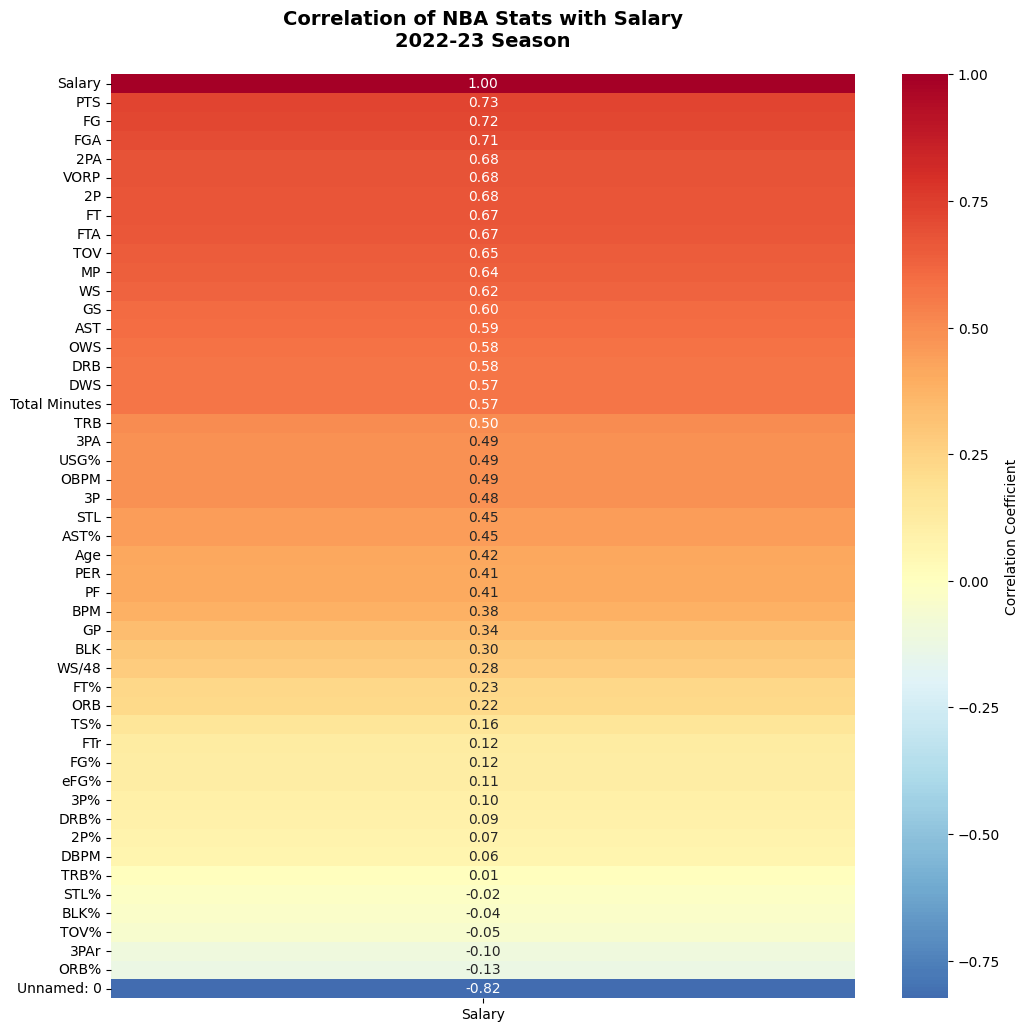

In [33]:
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 12))

# Create the heatmap with enhanced styling
sns.heatmap(corr[['Salary']].sort_values(by='Salary', ascending=False),
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='RdYlBu_r',  # Red-Yellow-Blue colormap (reversed)
            center=0,    # Center the colormap at 0
          # Make the plot square
            cbar_kws={'label': 'Correlation Coefficient'})

# Customize the plot
plt.title("Correlation of NBA Stats with Salary\n2022-23 Season", 
          pad=20, 
          fontsize=14, 
          fontweight='bold')

# Rotate x-axis labels for better readability


# Adjust layout to prevent label cutoff


# Save the plot with high resolution
plt.savefig('salary_correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [35]:
# Print top 5 positive and negative correlations
print("\nTop 5 Positive Correlations with Salary:")
print(corr['Salary'].sort_values(ascending=False).head(6)[1:6])  # Skip Salary itself

print("\nTop 5 Negative Correlations with Salary:")
print(corr['Salary'].sort_values(ascending=True).head(6)) 


Top 5 Positive Correlations with Salary:
PTS     0.727597
FG      0.720260
FGA     0.706393
2PA     0.681926
VORP    0.680339
Name: Salary, dtype: float64

Top 5 Negative Correlations with Salary:
Unnamed: 0   -0.824079
ORB%         -0.126255
3PAr         -0.102645
TOV%         -0.048385
BLK%         -0.036836
STL%         -0.023551
Name: Salary, dtype: float64


ased on the correlation analysis, the features most positively associated with Salary are related to offensive performance. The top five include PTS (Points per Game), FG (Field Goals Made), FGA (Field Goal Attempts), 2PA (Two-Point Attempts), and VORP (Value Over Replacement Player). These indicate that players who score more and have a high offensive impact tend to earn significantly higher salaries. In particular, VORP captures a player’s overall contribution compared to a replacement-level player, further confirming the value of all-around performance.

On the other hand, features with the highest negative correlations are ORB% (Offensive Rebound Percentage), 3PAr (Three-Point Attempt Rate), TOV% (Turnover Percentage), BLK% (Block Percentage), and STL% (Steal Percentage). These metrics are generally related to defensive or specialized roles and show weaker or slightly negative associations with salary. This suggests that while these skills are important, they are not as highly rewarded in salary decisions as scoring and offensive efficiency.

In conclusion, scoring and advanced performance metrics are the strongest predictors of salary, while defensive stats have less influence on financial compensation in the NBA.



ترجمه:
ناءً على تحليل الارتباط، تبيّن أن الخصائص الأكثر ارتباطًا إيجابيًا مع Salary تتعلق بالأداء الهجومي. أهم خمسة متغيرات هي: PTS (عدد النقاط في كل مباراة)، FG (عدد التسديدات الناجحة)، FGA (عدد المحاولات للتسجيل)، 2PA (محاولات التسديد من داخل القوس)، وVORP (قيمة اللاعب مقارنةً بلاعب بديل). هذه النتائج تشير إلى أن اللاعبين الذين يسجلون أكثر ويؤدون دورًا هجوميًا كبيرًا يحصلون على رواتب أعلى بشكل واضح. خاصةً، يعكس مؤشر VORP مساهمة اللاعب الشاملة في الفريق، مما يؤكد أهمية الأداء المتكامل في تحديد الراتب.

في المقابل، أظهرت بعض المتغيرات ارتباطًا سلبيًا مع Salary، مثل: ORB% (نسبة المتابعة الهجومية)، 3PAr (نسبة تسديدات الثلاثيات)، TOV% (نسبة فقدان الكرة)، BLK% (نسبة الصدات)، وSTL% (نسبة السرقات). هذه الإحصائيات ترتبط غالبًا بالأدوار الدفاعية أو المتخصصة، وقد أظهرت ارتباطًا ضعيفًا أو سلبيًا بسيطًا مع الرواتب. وهذا يشير إلى أن هذه المهارات، رغم أهميتها، لا تُكافأ ماليًا بنفس مستوى مهارات التسجيل أو الفاعلية الهجومية.

الخلاصة: الأداء الهجومي والمؤشرات المتقدمة مثل PTS و VORP تُعد من أهم العوامل التي تؤثر في تحديد رواتب اللاعبين في الدوري، بينما تلعب الإحصائيات الدفاعية دورًا ثانويًا في هذا السياق.